In [2]:
import matplotlib.pyplot as plt
import numpy as np
import path # librairie tierce, `pip install path.py`

%matplotlib inline

## Avec path (librairie tierce, renvoie des path.Path)

In [3]:
data_folder = path.Path("../../data/pac_power/") # save the path as a string
files = data_folder.glob("*.csv") # extract all .csv from the path
print(type(files))
for file in files:
    print(file, type(file))


<class 'list'>
../../data/pac_power/7.csv <class 'path.Path'>
../../data/pac_power/3.csv <class 'path.Path'>
../../data/pac_power/10.csv <class 'path.Path'>
../../data/pac_power/1.csv <class 'path.Path'>
../../data/pac_power/12.csv <class 'path.Path'>
../../data/pac_power/5.csv <class 'path.Path'>
../../data/pac_power/2.csv <class 'path.Path'>
../../data/pac_power/11.csv <class 'path.Path'>
../../data/pac_power/9.csv <class 'path.Path'>
../../data/pac_power/4.csv <class 'path.Path'>
../../data/pac_power/8.csv <class 'path.Path'>
../../data/pac_power/6.csv <class 'path.Path'>


In [4]:
sorted(files)

[Path(u'../../data/pac_power/1.csv'),
 Path(u'../../data/pac_power/10.csv'),
 Path(u'../../data/pac_power/11.csv'),
 Path(u'../../data/pac_power/12.csv'),
 Path(u'../../data/pac_power/2.csv'),
 Path(u'../../data/pac_power/3.csv'),
 Path(u'../../data/pac_power/4.csv'),
 Path(u'../../data/pac_power/5.csv'),
 Path(u'../../data/pac_power/6.csv'),
 Path(u'../../data/pac_power/7.csv'),
 Path(u'../../data/pac_power/8.csv'),
 Path(u'../../data/pac_power/9.csv')]

il est possible d'ordonner une liste. Mais ce sera l'ordre naturel des objets dans la liste qui différera si ce sont des str, des int....

De plus, il est parfois impossible d'ordonner des objets hétérogènes.

In [7]:
"7" > 9

True

In [8]:
sorted([9, "7"])

[9, '7']

Mais `sorted` prend un argument `key` supplémentaire : une fonction permettant de convertir les objets de façon à les comparer entre eux.

In [9]:
sorted([9, "7"], key=float)

['7', 9]

Il est possible d'utiliser cet argument pour ordonner nos fichiers !

In [4]:
def extract_number_from_file(file):
    return int(file.basename().stripext()) # basename = conserve only the name / stripext = remove the extention


In [11]:
print(file)
extract_number_from_file(file)

../../data/pac_power/6.csv


6

In [5]:
files = path.Path("../../data/pac_power/").files("*.csv")
for file in sorted(files,
                   key=extract_number_from_file):
    print(file, type(file))

../../data/pac_power/1.csv <class 'path.Path'>
../../data/pac_power/2.csv <class 'path.Path'>
../../data/pac_power/3.csv <class 'path.Path'>
../../data/pac_power/4.csv <class 'path.Path'>
../../data/pac_power/5.csv <class 'path.Path'>
../../data/pac_power/6.csv <class 'path.Path'>
../../data/pac_power/7.csv <class 'path.Path'>
../../data/pac_power/8.csv <class 'path.Path'>
../../data/pac_power/9.csv <class 'path.Path'>
../../data/pac_power/10.csv <class 'path.Path'>
../../data/pac_power/11.csv <class 'path.Path'>
../../data/pac_power/12.csv <class 'path.Path'>


### Analyser ces différents fichiers

In [6]:
files = path.Path("../../data/pac_power/").files("*.csv")
type(files)

list

On va utiliser un dictionnaire pour stocker les différentes données : ce dictionnaire contiendra en clé *le numéro du mois* et en valeur *le tableau numpy contenant les données*.

In [7]:
import calendar

In [8]:
data_dict = {}
for file in sorted(files, key=extract_number_from_file):
    month_number = extract_number_from_file(file)
    month_name = calendar.month_name[month_number]
    print(month_name)
    data_dict[month_number] = np.loadtxt(file, delimiter=",")

January
February
March
April
May
June
July
August
September
October
November
December


In [9]:
print(data_dict[1].shape)
print(data_dict[2].shape)

(31, 24)
(28, 24)


On peut visualiser l'ensemble des puissance, heure par heure pour chaques jours de chaques mois.

In [27]:
print([d.max() for d in data_dict.values()]) # max of each month
print(max([d.max() for d in data_dict.values()])) # max(max of each month)

[1888.0, 1888.0, 1903.0, 1242.0, 1070.0, 0.0, 0.0, 0.0, 0.0, 1212.0, 1919.0, 1896.0]
1919.0


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3d24fbc10>


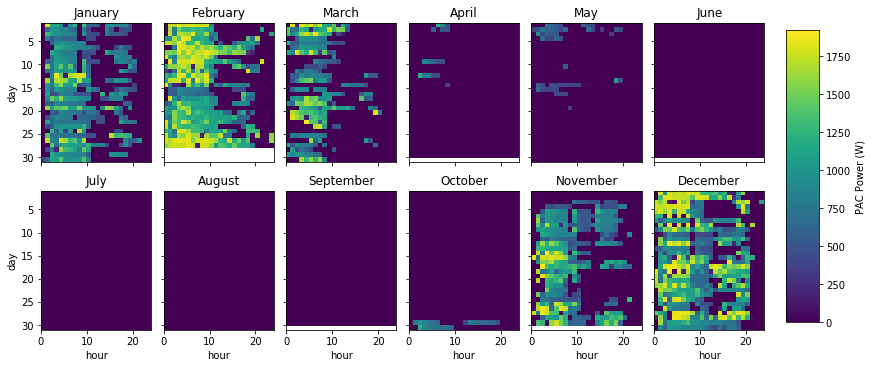

In [10]:
fig, axs = plt.subplots(2, 6, sharex="all", sharey="all",
                        figsize=(12, 5), constrained_layout=True) # create the subplot
power_max = max([d.max() for d in data_dict.values()]) # global max (for set the maximum of pcolormesh)

print(axs) # why ?

for i, ax in enumerate(axs.flatten(), 1): # axs.flatten = collapse of axs on 1 dimension
    pcm = ax.pcolormesh(data_dict[i], vmin=0, vmax=power_max)
    ax.set_title(calendar.month_name[i])
    ax.set_ylim(31, 1)
[ax.set_ylabel("day") for ax in axs[:, 0]]
[ax.set_xlabel("hour") for ax in axs[1, :]]

fig.colorbar(pcm, ax=axs.flatten().tolist(),
             shrink=0.95, label="PAC Power (W)");

Il est également possible de calculer un certain nombre de métriques pour chaques mois :

In [11]:
for month_number, data in sorted(data_dict.items()):
    month_name = calendar.month_name[month_number]
    
    mean_power = data.mean()
    max_power = data.max()
    std_power = data.std()
    day_max, hour_max = np.unravel_index(np.argmax(data), data.shape)
    frac_func = data[np.where(data != 0)].size / data.size
    
    print(f"""{month_name}
    mean: {mean_power:g} W
    max: {max_power:g} W {f'({day_max + 1:02d}/{month_number:02d} {hour_max}H)' if max_power != 0 else ''}
    std: {std_power:g}
    % func: {frac_func*100:g}
    """)

January
    mean: 482.427 W
    max: 1888 W (13/01 3H)
    std: 500.357
    % func: 55.5108
    
February
    mean: 789.438 W
    max: 1888 W (06/02 3H)
    std: 678.609
    % func: 67.5595
    
March
    mean: 352.702 W
    max: 1903 W (23/03 4H)
    std: 539.484
    % func: 36.1559
    
April
    mean: 21.8069 W
    max: 1242 W (13/04 2H)
    std: 134.532
    % func: 3.05556
    
May
    mean: 35.8817 W
    max: 1070 W (14/05 18H)
    std: 135.335
    % func: 8.19892
    
June
    mean: 0 W
    max: 0 W 
    std: 0
    % func: 0
    
July
    mean: 0 W
    max: 0 W 
    std: 0
    % func: 0
    
August
    mean: 0 W
    max: 0 W 
    std: 0
    % func: 0
    
September
    mean: 0 W
    max: 0 W 
    std: 0
    % func: 0
    
October
    mean: 21.5968 W
    max: 1212 W (31/10 2H)
    std: 126.837
    % func: 2.95699
    
November
    mean: 453.224 W
    max: 1919 W (15/11 3H)
    std: 542.299
    % func: 49.4444
    
December
    mean: 790.179 W
    max: 1896 W (19/12 3H)
    std: 64

## Exercice: affichage de l'energie journalière

L'objectif de l'exercice est d'obtenir une énergie dépensé chaques jour par la PAC, en kWH puis en MJ.

Indices : il est possible de *concatener* les array numpy avec `np.concatenate(une_liste_d'array)`. La somme se fait avec `np.sum(array)` et accepte un argument `axis` pour ne sommer d'une dimension.

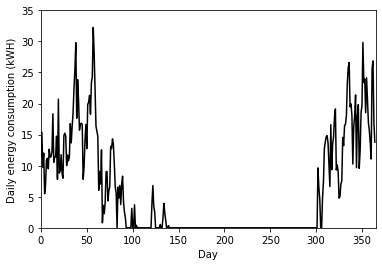

In [15]:
list_of_arrays = list(data_dict.values()) # extract all dict values into a list
annual_pac_power = np.concatenate(list_of_arrays, axis=0) # concatenate all the cells of list
print(type(annual_pac_power)) # annual_pac_power is an array

print(annual_pac_power.shape) # On vérifie que les dimensions sont cohérentes (365 days, 24 hours)
daily_energy = (annual_pac_power / 1000).sum(axis=1) # W -> kW, puis somme sur la dimension des heures.
print(daily_energy.shape) # On vérifie que le résultat ai une dimension avec 365 valeurs.

<class 'numpy.ndarray'>
(365, 24)
(365,)


(0, 33.8604)

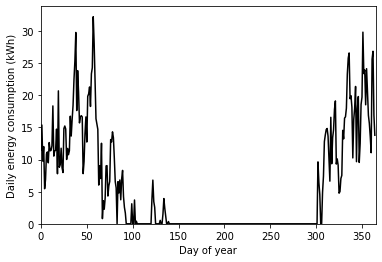

In [16]:
fig, ax = plt.subplots() # on crée la figure et l'axe (qui contiendra les courbes)
ax.plot(daily_energy, color="black")  # on affiche l'énergie journalière
# Ajout des labels
ax.set_xlabel("Day of year")
ax.set_ylabel("Daily energy consumption (kWh)")
# Gestion des échelles
ax.set_xlim(0, 365)
ax.set_ylim(0)

[***Prochaine section***](fonda_07-conditions.ipynb)